In [1]:
# se instala e importa las ribrerias(modulos) necesarios para  el analisis
#!pip  install scikit-learn==1.1.2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
'''
from keras.models import load_model
import keras.backend as K

from sklearn.preprocessing import SplineTransformer
from sklearn import metrics
from sklearn.metrics import confusion_matrix, recall_score, precision_score, classification_report, roc_curve
from sklearn import linear_model
from scipy.spatial import distance
'''
warnings.filterwarnings('ignore')

In [2]:
# cargar  archivo de test para  chequear  el comportamiento de los modelos  ajustados( regresion y clasificacion binariacd Desktop)
data = pd.read_csv("Data/IG Data Scientist Challenge.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16880 entries, 0 to 16879
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       16880 non-null  int64  
 1   B       16880 non-null  int64  
 2   C       13683 non-null  float64
 3   D       16880 non-null  int64  
 4   E       16880 non-null  int64  
 5   F       16880 non-null  float64
 6   G       16880 non-null  float64
 7   H       16880 non-null  int64  
 8   I       16880 non-null  int64  
 9   J       16880 non-null  object 
 10  K       4016 non-null   float64
 11  L       16880 non-null  int64  
 12  M       16880 non-null  int64  
 13  N       16880 non-null  int64  
 14  O       16880 non-null  int64  
 15  P       16880 non-null  int64  
 16  Q       16880 non-null  object 
 17  R       16880 non-null  object 
 18  S       16880 non-null  float64
 19  Monto   16880 non-null  object 
 20  Fraude  16880 non-null  int64  
dtypes: float64(5), int64(12), object(4)

In [3]:
data.head()

,A,B,C,D,E,F,G,H,I,J,...,L,M,N,O,P,Q,R,S,Monto,Fraude
0,0,10,50257.0,0,0,0.0,0.0,0,0,UY,...,0,3,1,0,5,0,0,7.25,37.51,1
1,0,10,29014.0,0,0,0.0,0.0,0,0,UY,...,0,1,1,0,3,0,0,11.66,8.18,1
2,0,7,92.0,0,1,0.0,0.0,0,1,UY,...,0,3,1,0,2,0,0,86.97,13.96,1
3,9,16,50269.0,0,0,0.0,0.0,0,0,UY,...,0,3,1,0,5,0,0,2.51,93.67,1
4,0,8,8180.0,0,0,0.0,0.0,0,0,UY,...,0,1,1,0,1,0,0,25.96,135.4,1


In [4]:
import matplotlib.gridspec as gridspecdatos = data
total = datos.isnull().sum().sort_values(ascending = False)

porcentaje_nulos = (datos.isnull().sum() / datos.isnull().count().sort_values(ascending = False))

datos_faltantes = pd.concat([total, porcentaje_nulos*100], axis = 1, keys = ['Total','Porcentaje'])

print('-------------------------------------',
      'Los Datos Faltantes del Dataset son :',
      total,
      'El % de Datos Faltantes del Dataset: ',
      datos_faltantes[datos_faltantes['Total']>0], sep = '\n')

-------------------------------------
Los Datos Faltantes del Dataset son :
K         12864
C          3197
L             0
Monto         0
S             0
R             0
Q             0
P             0
O             0
N             0
M             0
A             0
B             0
J             0
I             0
H             0
G             0
F             0
E             0
D             0
Fraude        0
dtype: int64
El % de Datos Faltantes del Dataset: 
   Total  Porcentaje
K  12864   76.208531
C   3197   18.939573


In [22]:
data['Q'] = pd.to_numeric(data['Q'],errors = 'coerce')
data['Monto'] = pd.to_numeric(data['Q'],errors = 'coerce')
data['R'] = pd.to_numeric(data['Q'],errors = 'coerce')

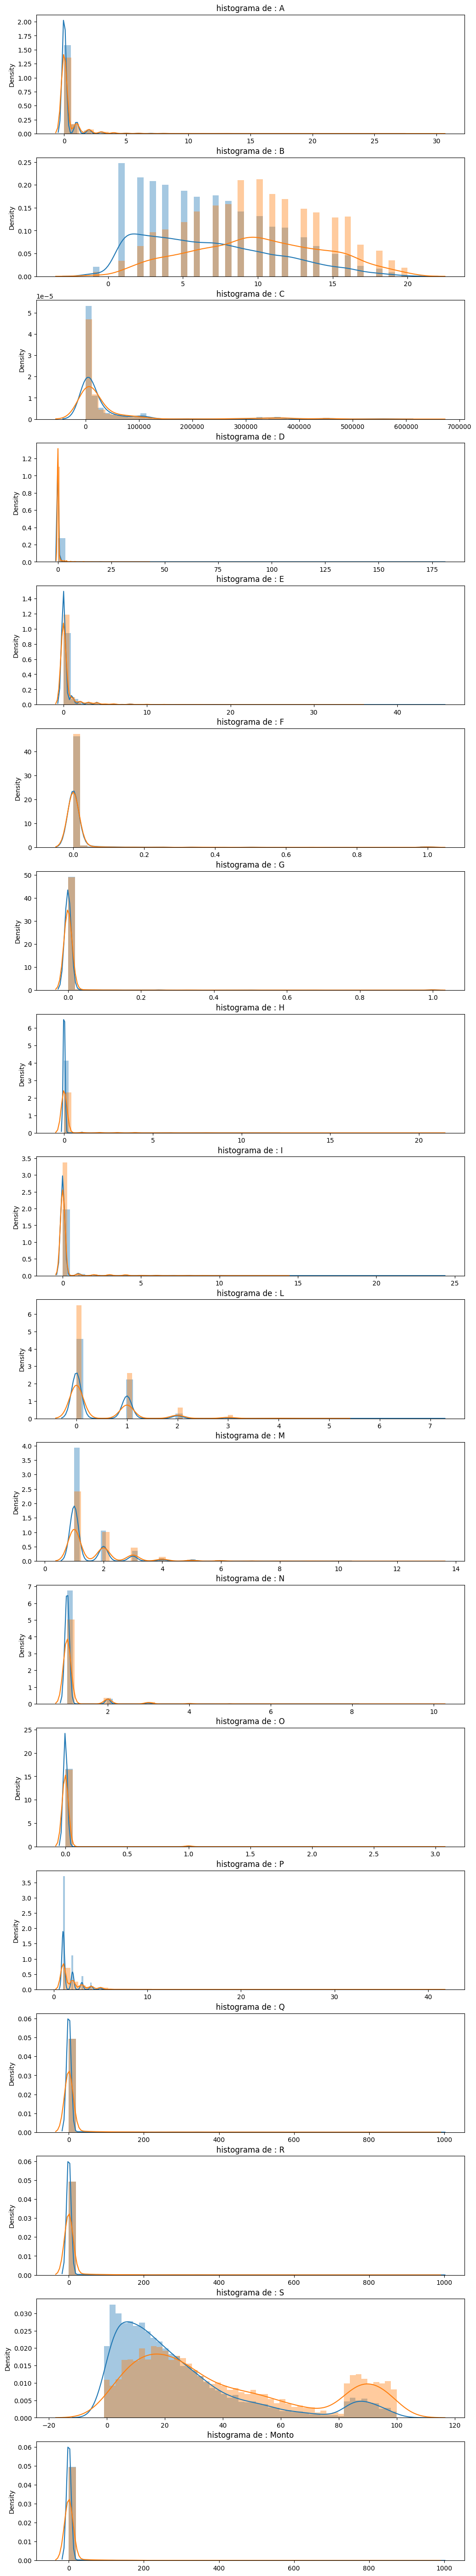

In [24]:
#Grafico de los histogramas por cada caracteristica
import matplotlib.gridspec as gridspec
v_features = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'L', 'M', 'N','O', 'P', 'Q', 'R', 'S', 'Monto']

plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(data[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(data[cn][data.Fraude== 0], bins=50)
    sns.distplot(data[cn][data.Fraude == 1], bins=50)
    ax.set_xlabel('')
    ax.set_title('histograma de : ' + str(cn))
plt.show()

Hay 12269 transacciones no fraudulentas (72.684%) y 4611 transacciones fraudulentas (27.316%).


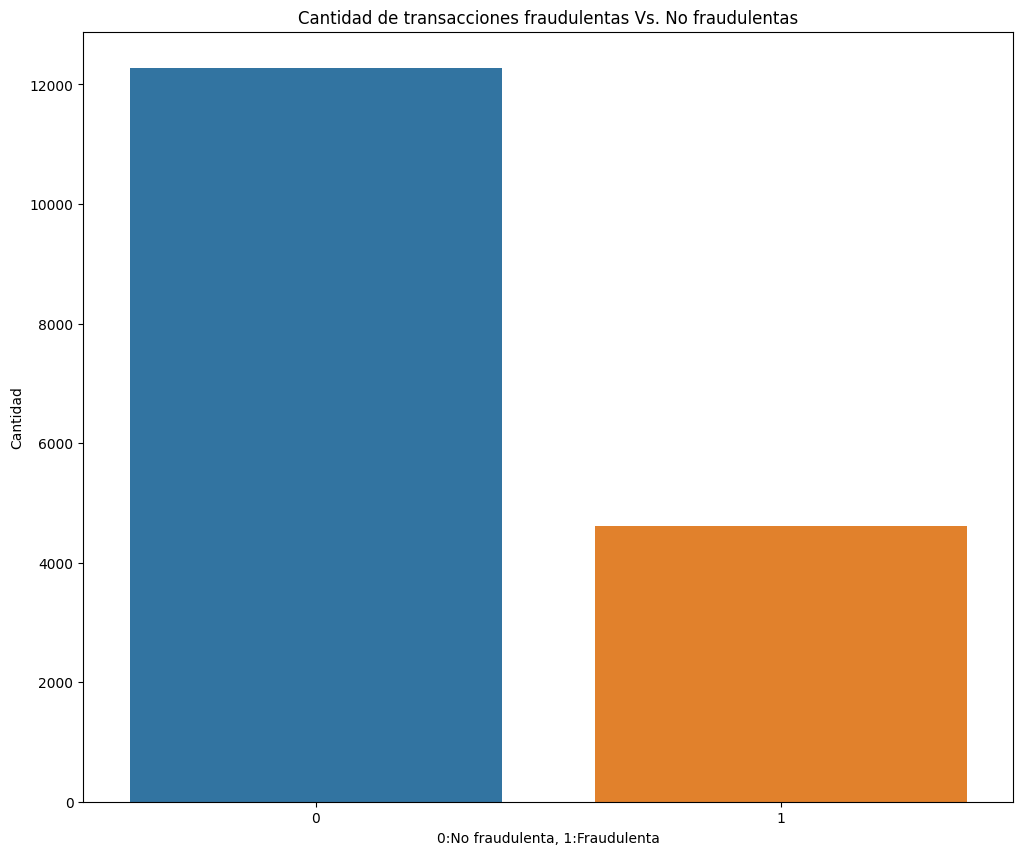

In [26]:
#Graph fraudulent vs not fraudulents transactions
counts = data.Fraude.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('Hay {} transacciones no fraudulentas ({:.3f}%) y {} transacciones fraudulentas ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))
    
plt.figure(figsize=(12,10))
sns.barplot(x=counts.index, y=counts)
plt.title('Cantidad de transacciones fraudulentas Vs. No fraudulentas')
plt.ylabel('Cantidad')
plt.xlabel('0:No fraudulenta, 1:Fraudulenta')
plt.show()

In [ ]:
#  boxplot para cada sensor

columns = test_data.columns.difference(['id','cycle','setting_0', 'setting_1', 'setting_2', 'label1', 'label2', 'RUL'])
df = test_data[columns]
descriptive_test = df.describe()

plt.boxplot(df)
plt.show()